Accuracy2 :  0.6339797267518731
Precision2:  0.5479478327579593
recall score2:  0.5210651103410542
fscore2:  0.5341684584462935


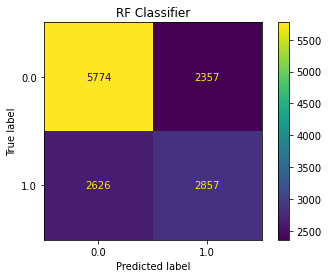

In [5]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics

AHS7py = pd.read_csv("AHSnoquote.csv") #load cleaned dataset
AHS8py = AHS7py.drop(AHS7py.columns[[0,1]],axis=1) #drop unneeded column

AHS9py = AHS8py
AHS9py.loc[AHS9py['TENURE']==1, 'label'] = 0 #recode tenure as label to be binary and in terms of 0 and 1 for classifiers
AHS9py.loc[AHS9py['TENURE']==2,'label'] = 1
AHS10py = AHS9py.drop(AHS9py.columns[[4]],axis=1)

X = np.array(AHS10py[['HINCP','HHGRAD','HHSEX','HSHLDTYPE']])
y = np.array(AHS10py["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #splitting data into testing and training set
class_names = ["class 0", "Class 1, class 2"]


classifierRF = RandomForestClassifier(n_estimators=500, random_state=23) #defining our random forest classifier
classifierRF.fit(X_train, y_train) #fitting the model 

disp2 = plot_confusion_matrix(classifierRF, X_test, y_test) #creating the confusion matrix plot
plt.title("RF Classifier")
y_predRF = classifierRF.predict(X_test) #creating the model predictors
accuracyRF = accuracy_score(y_test,y_predRF) #calculating accuracy score
precisionRF = sklearn.metrics.precision_score(y_test,y_predRF) #calculating precision scores
recallRF = sklearn.metrics.recall_score(y_test,y_predRF) #calculating recall score
fscoreRF = sklearn.metrics.f1_score(y_test,y_predRF) #calculating fscore
print("Accuracy2 : ", accuracyRF)
print("Precision2: ",precisionRF)
print("recall score2: ",recallRF)
print("fscore2: ",fscoreRF)

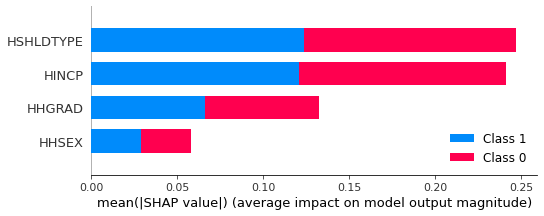

In [7]:

import shap
from sklearn.ensemble import RandomForestClassifier

X2 = AHS10py.iloc[:, :-1]; y = AHS10py['label']  
clf2 = RandomForestClassifier(n_estimators=500, random_state=23) #creating classifier for shap analysis
clf2.fit(X2, y)
explainer2 = shap.Explainer(clf2) #creating shap explainer
shap_values2 = explainer2.shap_values(X2[::200]) #grabbing shap values
shap.summary_plot(shap_values2, X2[::200]) #generating shap summary plot


True Class (if 0, Home Owned, othewise Home Not Owned ): 0
Probability that this data point belong to class 0 = 0.88
Base Probability for class 0 = 0.61


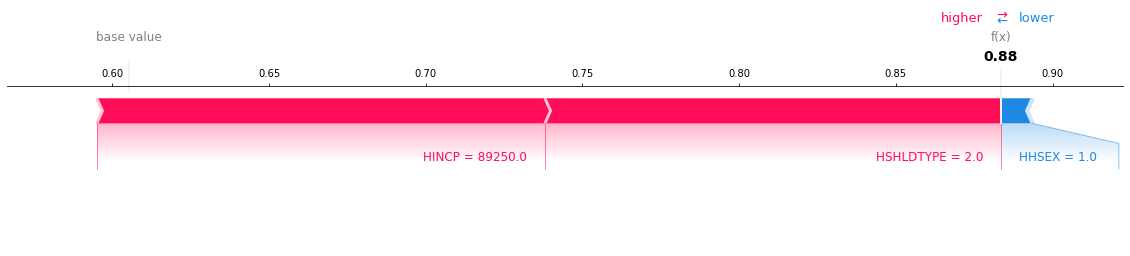

In [8]:

object_i = 33
class_object_i = int(y[::200].iloc[object_i])
print('True Class (if 0, Home Owned, othewise Home Not Owned ):', class_object_i) 
print('Probability that this data point belong to class 0 = %0.2f'%(explainer2.expected_value[0] + sum(shap_values2[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer2.expected_value[0]))

shap.force_plot(explainer2.expected_value[0], 
                shap_values2[0][object_i,:], 
                X2.iloc[object_i,:], 
                matplotlib=True) #creating the shap force plot to show variable weights on result of classification